<a href="https://colab.research.google.com/github/stories2/Kangnam_ML/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=e7213b55f9bfbe2382a6de60d10de4b04b8b1fb434bbfa47068ff28687477f2f
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

In [3]:
x, y = mglearn.datasets.make_wave(n_samples=50)

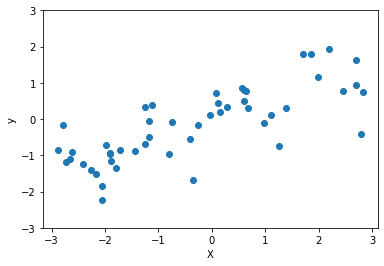

In [4]:
plt.plot(x, y, 'o')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim(-3, 3)
plt.show()

In [5]:
train_input, test_input, train_target, test_target = train_test_split(x, y, train_size=0.7, random_state=1004)

In [6]:
train_input[:2], train_target[:2]

(array([[ 2.7937922 ],
        [-1.89957294]]), array([-0.40493456, -0.96789094]))

In [7]:
knr = KNeighborsRegressor(n_jobs=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_jobs=3)

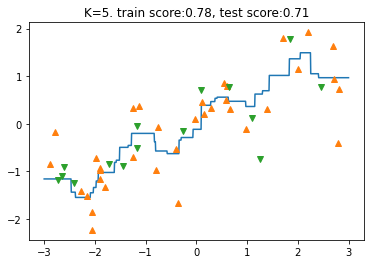

In [8]:
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, knr.predict(xs.reshape(-1,1)))
plt.plot(train_input,train_target, '^')
plt.plot(test_input, test_target, 'v')
plt.title("K={}. train score:{:.2f}, test score:{:.2f}".format(
     knr.n_neighbors, knr.score(train_input, train_target), knr.score(test_input, test_target)))
plt.show()

In [9]:
knr.predict(train_input[:10]), train_target[:10]

(array([ 0.96867834, -1.02356868,  0.38891827, -1.15962549, -1.15962549,
         1.01636118,  0.38891827, -1.45054953,  0.96867834, -0.62769001]),
 array([-0.40493456, -0.96789094,  0.19956723, -0.83992942, -0.16588531,
         1.79968048,  0.32552873, -2.23142912,  0.94576536, -0.53755626]))

In [10]:
# k 가 왜 높게 나왔을까

In [11]:
xs = np.linspace(-3, 3, 1000)
xs_reshaped = xs.reshape(-1,1)

In [12]:
def neighborRegression(n, train_input, train_target, test_input, test_target, wave):
  knr = KNeighborsRegressor(n_jobs=3, n_neighbors=n)
  knr.fit(train_input, train_target)
  return (n, knr.score(train_input, train_target), knr.score(test_input, test_target), knr.predict(wave))

In [15]:
result = []

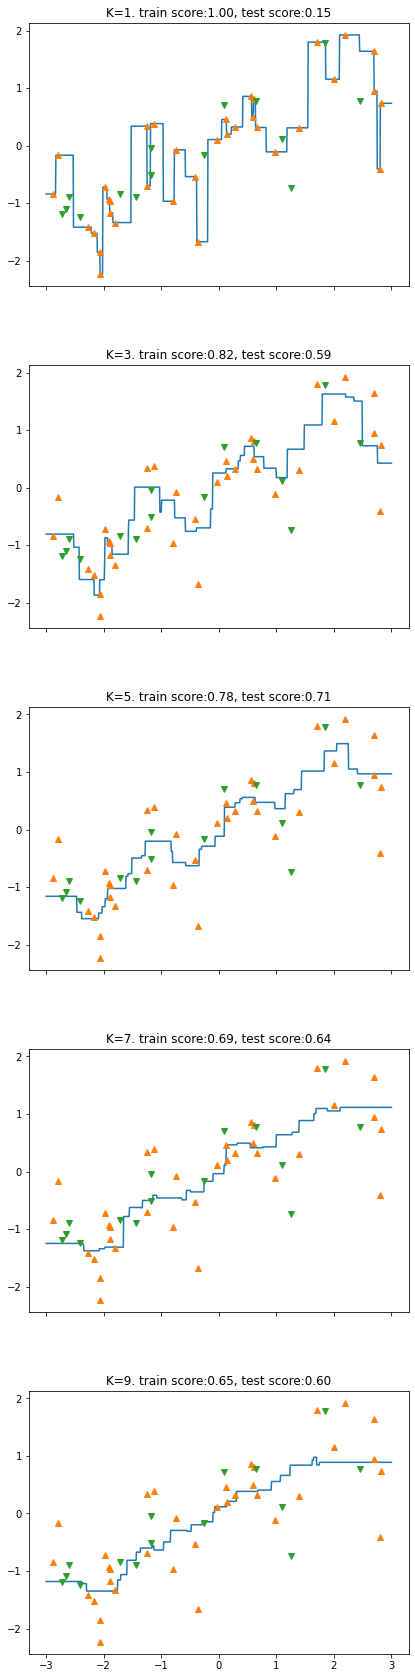

In [16]:
f, axes = plt.subplots(ncols=1, nrows=5, sharex=True, sharey=True)
f.set_size_inches((30, 30))

n_neighbor_cnt = 0

for ax in axes:
  n_neighbor = n_neighbor_cnt * 2 + 1
  _, train_score, test_score, wave_predict = neighborRegression(n_neighbor, train_input, train_target, test_input, test_target, xs_reshaped)
  # ax.plot([1, 2, 3], [1, 2, 3])
  ax.plot(xs, wave_predict)
  ax.plot(train_input,train_target, '^')
  ax.plot(test_input, test_target, 'v')
  ax.set_title("K={}. train score:{:.2f}, test score:{:.2f}".format(n_neighbor, train_score, test_score))
  ax.set(adjustable='box', aspect='equal')

  result.append((n_neighbor, train_score, test_score))
  n_neighbor_cnt += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
plt.show()

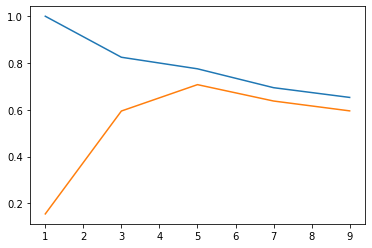

In [31]:
plt.plot([val[0] for val in result], [val[1] for val in result])
plt.plot([val[0] for val in result], [val[2] for val in result])
plt.show()

K가 5일 때 가장 BEST

테스트 데이터의 점수 결과와 학습 데이터의 점수 결과가 각각 `0.78`, `0.71` 로 크게 차이 나지 않으면서 테스트 데이터의 점숫값이 1, 3, 5, 7, 9 중에서 가장 높습니다.

이런 결과가 나온 이유는 주변 이웃을 이용해 예측할 때 n_neighbors 값이 너무 작은 값을 가지면 가장 근접한 이웃들로만 계산해 과적합이 되어 테스트 점수가 낮고, 너무 높은 값이면 멀리 떨어진 이웃을 이용해 계산하므로 결과가 좋지 못한 문제가 있기 때문입니다.